<a href="https://colab.research.google.com/github/mentorbruh/digit-recognizer/blob/main/Digit_recognizer_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In this second part of digit recognizer, we explore different activation functions and keras tuner functionalities and also plot our train and validation data accuracies.

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Dataset:

In [ ]:
data = mnist.load_data()
(X_train, y_train), (X_test, y_test) = data

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
# Lets plot one number:

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

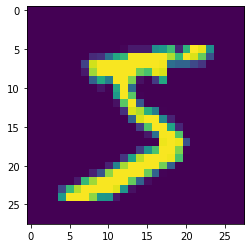

In [ ]:
# lets see this image:
plt.imshow(X_train[0])

In [ ]:
# Actual label of above image:
y_train[0]

5

In [ ]:
# Reshape each image to 28 x 28 and convert these images to gray scale:

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
# make 10 categories for target variable y.

y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# CNN Model:


## Model 1:
Activation function: Relu with 32 nodes.

In [ ]:
model_1 = Sequential()

# Convolution layer:
model_1.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = [28, 28, 1]))
model_1.add(Conv2D(16, kernel_size = 3, activation = 'relu'))

#Flatten:
model_1.add(Flatten())

# Output layer:
model_1.add(Dense(units = 10, activation = 'softmax'))

model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_1.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2603 - accuracy: 0.9470 - val_loss: 0.0898 - val_accuracy: 0.9725
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0748 - accuracy: 0.9773 - val_loss: 0.0942 - val_accuracy: 0.9720
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.0975 - val_accuracy: 0.9711
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0399 - accuracy: 0.9872 - val_loss: 0.1047 - val_accuracy: 0.9721
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0343 - accuracy: 0.9893 - val_loss: 0.1148 - val_accuracy: 0.9749
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0266 - accuracy: 0.9920 - val_loss: 0.1087 - val_accuracy: 0.9768
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.1097 - val_accuracy:

The predicton accuracy of this model is 99.54%

Now we increase the number of nodes to 64 and then check the accuracy of this model.

In [ ]:
model_1 = Sequential()

# Convolution layer:
model_1.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = [28, 28, 1]))
model_1.add(Conv2D(32, kernel_size = 3, activation = 'relu'))

#Flatten:
model_1.add(Flatten())

# Output layer:
model_1.add(Dense(units = 10, activation = 'softmax'))

model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_1.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2165 - accuracy: 0.9501 - val_loss: 0.1072 - val_accuracy: 0.9687
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0680 - accuracy: 0.9795 - val_loss: 0.0923 - val_accuracy: 0.9746
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0487 - accuracy: 0.9849 - val_loss: 0.0959 - val_accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.1151 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0991 - val_accuracy: 0.9789
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0259 - accuracy: 0.9924 - val_loss: 0.1144 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0227 - accuracy: 0.9937 - val_loss: 0.1273 - val_accuracy:

The prediction acuuracy of this model is 99.54% which is same as previous model.

## Model 2:
Activation function: Leaky Relu

In [ ]:
lrelu = lambda x: tf.keras.activations.relu(x, alpha=0.1)

[Referance](https://stackoverflow.com/questions/48828478/how-do-you-use-keras-leakyrelu-in-python/48828561)

In [ ]:
model_2 = Sequential()

# Convolution layer:
model_2.add(Conv2D(32, kernel_size = 3, activation= lrelu , input_shape = [28, 28, 1]))
model_2.add(Conv2D(16, kernel_size = 3, activation= lrelu))

#Flatten:
model_2.add(Flatten())

# Output layer:
model_2.add(Dense(units = 10, activation = 'softmax'))

model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_2.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4088 - accuracy: 0.9348 - val_loss: 0.1061 - val_accuracy: 0.9679
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1151 - accuracy: 0.9696 - val_loss: 0.1128 - val_accuracy: 0.9721
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1020 - accuracy: 0.9743 - val_loss: 0.1482 - val_accuracy: 0.9645
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0966 - accuracy: 0.9768 - val_loss: 0.1308 - val_accuracy: 0.9720
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0864 - accuracy: 0.9805 - val_loss: 0.1548 - val_accuracy: 0.9740
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0941 - accuracy: 0.9812 - val_loss: 0.1889 - val_accuracy: 0.9725
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0753 - accuracy: 0.9850 - val_loss: 0.2518 - val_accuracy:

The prediction accuracy of this model is 98.72% which is less than the 1st model.

Now we increase the nodes and check whether we get better accuracy or not.

In [ ]:
model_2 = Sequential()

# Convolution layer:
model_2.add(Conv2D(64, kernel_size = 3, activation= lrelu , input_shape = [28, 28, 1]))
model_2.add(Conv2D(32, kernel_size = 3, activation= lrelu))

#Flatten:
model_2.add(Flatten())

# Output layer:
model_2.add(Dense(units = 10, activation = 'softmax'))

model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_2.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3069 - accuracy: 0.9433 - val_loss: 0.1229 - val_accuracy: 0.9725
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1516 - accuracy: 0.9667 - val_loss: 0.1723 - val_accuracy: 0.9612
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1913 - accuracy: 0.9684 - val_loss: 0.2422 - val_accuracy: 0.9577
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1677 - accuracy: 0.9750 - val_loss: 0.2291 - val_accuracy: 0.9726
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1776 - accuracy: 0.9785 - val_loss: 0.4960 - val_accuracy: 0.9626
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2259 - accuracy: 0.9799 - val_loss: 0.3584 - val_accuracy: 0.9791
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2168 - accuracy: 0.9829 - val_loss: 0.3735 - val_accuracy:

The prediction accuracy of this model increase slightly after increment in nodes.

## Model 3:
Activation function: Elu

[Referance](https://stackoverflow.com/questions/56184666/how-to-set-alpha-parameter-in-activationelu-layer)

In [ ]:
from keras.activations import elu

ELU = lambda x: elu(x, alpha=0.4)

In [ ]:
model_3 = Sequential()

# Convolution layer:
model_3.add(Conv2D(32, kernel_size = 3, activation= ELU , input_shape = [28, 28, 1]))
model_3.add(Conv2D(16, kernel_size = 3, activation= ELU))

#Flatten:
model_3.add(Flatten())

# Output layer:
model_3.add(Dense(units = 10, activation = 'softmax'))

model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_3.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2398 - accuracy: 0.9441 - val_loss: 0.1167 - val_accuracy: 0.9705
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0941 - accuracy: 0.9743 - val_loss: 0.1031 - val_accuracy: 0.9752
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0774 - accuracy: 0.9805 - val_loss: 0.1275 - val_accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0659 - accuracy: 0.9847 - val_loss: 0.1495 - val_accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0629 - accuracy: 0.9872 - val_loss: 0.1688 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0509 - accuracy: 0.9905 - val_loss: 0.2361 - val_accuracy: 0.9743
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0550 - accuracy: 0.9908 - val_loss: 0.2190 - val_accuracy:

The prediction accuracy of this model is 99.30%

In [ ]:
model_3 = Sequential()

# Convolution layer:
model_3.add(Conv2D(64, kernel_size = 3, activation= ELU , input_shape = [28, 28, 1]))
model_3.add(Conv2D(32, kernel_size = 3, activation= ELU))

#Flatten:
model_3.add(Flatten())

# Output layer:
model_3.add(Dense(units = 10, activation = 'softmax'))

model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_3.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2779 - accuracy: 0.9418 - val_loss: 0.1378 - val_accuracy: 0.9671
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1394 - accuracy: 0.9710 - val_loss: 0.2218 - val_accuracy: 0.9611
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1264 - accuracy: 0.9788 - val_loss: 0.2339 - val_accuracy: 0.9654
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1249 - accuracy: 0.9832 - val_loss: 0.2362 - val_accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1023 - accuracy: 0.9877 - val_loss: 0.3062 - val_accuracy: 0.9795
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1103 - accuracy: 0.9890 - val_loss: 0.5387 - val_accuracy: 0.9723
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0944 - accuracy: 0.9916 - val_loss: 0.4826 - val_accuracy:

The prediction accuracy of this model is 99.38%

# Keras Tuner:
[Referance](https://keras-team.github.io/keras-tuner/)

###  1. Using Relu actication function

In [ ]:
import keras

def build_model(hp):
  model = keras.Sequential([
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_1', min_value = 32, max_value = 100, step = 10),
                                kernel_size = hp.Choice('kernel_1', values = [3, 5]),
                                activation = 'relu',
                                input_shape = (28, 28, 1)
                            ),
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_2', min_value = 32, max_value = 64, step = 10),
                                kernel_size = hp.Choice('kernel_2', values = [3, 5]),
                                activation = 'relu'
                            ),
                            keras.layers.Flatten(),
                            keras.layers.Dense(
                                units = hp.Int('dense_1', min_value = 32, max_value = 100, step = 10),
                                activation = 'relu'
                            ),
                            keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', values = [1e-2, 1e-3])),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model
  

In [ ]:
pip install -U keras-tuner

     |████████████████████████████████| 71kB 6.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78937 sha256=51d9ad64798d110fda350775a64fd22220002e25f66b12ae521ecffd65fcc63f
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=1bd9aff4ac8ca364bf47822ed5163bd0b6931a195fb404bbe1a41ada6e54801e
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials = 10, 
                     directory = 'output', project_name = 'DR')

INFO:tensorflow:Reloading Oracle from existing project output/DR/oracle.json
INFO:tensorflow:Reloading Tuner from output/DR/tuner0.json


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
filter_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 10, 'sampling': None}
kernel_1 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
filter_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 10, 'sampling': None}
kernel_2 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
dense_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 10, 'sampling': None}
lerning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001], 'ordered': True}


In [ ]:
tuner.search(X_train, y_train, epochs = 30, validation_split = 0.2)

Trial 5 Complete [00h 03m 00s]
val_accuracy: 0.1080833300948143

Best val_accuracy So Far: 0.9835000038146973
Total elapsed time: 00h 14m 21s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model_1 = tuner.get_best_models(num_models=1)[0]

In [ ]:
best_model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 82)        2132      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 52)        38428     
_________________________________________________________________
flatten (Flatten)            (None, 25168)             0         
_________________________________________________________________
dense (Dense)                (None, 82)                2063858   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                830       
Total params: 2,105,248
Trainable params: 2,105,248
Non-trainable params: 0
_________________________________________________________________


 **Now we apply this model to our train data and then see the accuracy of this best model**

In [ ]:
history_1 = best_model_1.fit(X_train, y_train, epochs = 10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0241 - accuracy: 0.9963 - val_loss: 0.2860 - val_accuracy: 0.9845
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0241 - accuracy: 0.9964 - val_loss: 0.2689 - val_accuracy: 0.9813
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0183 - accuracy: 0.9970 - val_loss: 0.2431 - val_accuracy: 0.9852
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0242 - accuracy: 0.9968 - val_loss: 0.2892 - val_accuracy: 0.9870
Epoch 8/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0224 - accuracy: 0.9974 - val_loss: 0.3042 - val_accuracy: 0.9847
Epoch 9/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0230 - accuracy: 0.9972 - val_loss: 0.3372 - val_accuracy: 0.9867
Epoch 10/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0269 - accuracy: 0.9971 - val_loss: 0.3315 - val_accuracy

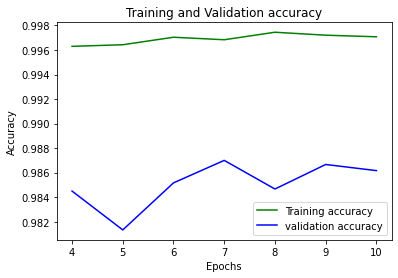

In [ ]:
train_acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
epochs = range(4, 11)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Prediction:

In [ ]:
prediction = best_model_1.predict(X_test)

In [ ]:
prediction

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 4.572769e-37,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [ ]:
print(np.argmax(prediction[0]))

7


our model predicts that, the 1st number in dataset is 7

lets see the label of this image in y_test

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

So prediction of our model is correct.

### 2. Using Leaky relu activation function

In [ ]:
lrelu = lambda x: tf.keras.activations.relu(x, alpha=0.1)

In [ ]:
import keras

def build_model(hp):
  model = keras.Sequential([
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_1', min_value = 32, max_value = 100, step = 10),
                                kernel_size = hp.Choice('kernel_1', values = [3, 5]),
                                activation = lrelu,
                                input_shape = (28, 28, 1)
                            ),
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_2', min_value = 32, max_value = 64, step = 10),
                                kernel_size = hp.Choice('kernel_2', values = [3, 5]),
                                activation = lrelu
                            ),
                            keras.layers.Flatten(),
                            keras.layers.Dense(
                                units = hp.Int('dense_1', min_value = 32, max_value = 100, step = 10),
                                activation = lrelu
                            ),
                            keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('lerning_rate', values = [1e-2, 1e-3])),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model

In [ ]:
tuner_1 = RandomSearch(build_model, objective='val_accuracy', max_trials = 5)

tuner_1.search(X_train, y_train, epochs = 3, validation_split = 0.1)

best_model_2 = tuner.get_best_models(num_models=1)[0]

best_model_2.summary()

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 82)        2132      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 52)        38428     
_________________________________________________________________
flatten (Flatten)            (None, 25168)             0         
_________________________________________________________________
dense (Dense)                (None, 82)                2063858   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                830       
Total params: 2,105,248
Trainable params: 2,105,248
Non-traina

In [ ]:
history_2 = best_model_2.fit(X_train, y_train, epochs = 10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0945 - val_accuracy: 0.9755
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0395 - accuracy: 0.9881 - val_loss: 0.0787 - val_accuracy: 0.9813
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.0763 - val_accuracy: 0.9825
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0282 - accuracy: 0.9922 - val_loss: 0.0992 - val_accuracy: 0.9820
Epoch 8/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0230 - accuracy: 0.9938 - val_loss: 0.0884 - val_accuracy: 0.9835
Epoch 9/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0244 - accuracy: 0.9936 - val_loss: 0.1204 - val_accuracy: 0.9832
Epoch 10/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0253 - accuracy: 0.9943 - val_loss: 0.1370 - val_accuracy

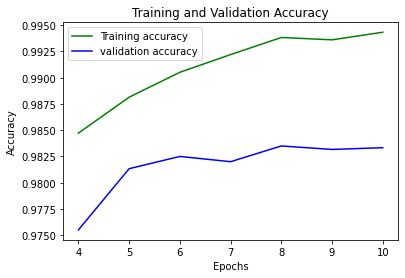

In [ ]:
train_acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
epochs = range(4, 11)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Prediction

In [ ]:
prediction_lrelu = best_model_2.predict(X_test)
print(np.argmax(prediction_lrelu[0]))
print(y_test[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## 3. Using Prelu activation function:

In [ ]:
from keras.activations import elu

ELU = lambda x: elu(x, alpha=0.4)

In [ ]:
import keras

def build_model(hp):
  model = keras.Sequential([
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_1', min_value = 32, max_value = 100, step = 10),
                                kernel_size = hp.Choice('kernel_1', values = [3, 5]),
                                activation = ELU,
                                input_shape = (28, 28, 1)
                            ),
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_2', min_value = 32, max_value = 64, step = 10),
                                kernel_size = hp.Choice('kernel_2', values = [3, 5]),
                                activation = ELU
                            ),
                            keras.layers.Flatten(),
                            keras.layers.Dense(
                                units = hp.Int('dense_1', min_value = 32, max_value = 100, step = 10),
                                activation = ELU
                            ),
                            keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('lerning_rate', values = [1e-2, 1e-3])),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model

In [ ]:
tuner_3 = RandomSearch(build_model, objective='val_accuracy', max_trials = 5)

tuner_3.search(X_train, y_train, epochs = 3, validation_split = 0.1)

best_model_3 = tuner.get_best_models(num_models=1)[0]

best_model_3.summary()

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 82)        2132      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 52)        38428     
_________________________________________________________________
flatten (Flatten)            (None, 25168)             0         
_________________________________________________________________
dense (Dense)                (None, 82)                2063858   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                830       
Total params: 2,105,248
Trainable params: 2,105,248
Non-traina

In [ ]:
history_3 = best_model_3.fit(X_train, y_train, epochs = 20, validation_split = 0.1, initial_epoch=3)

Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0191 - accuracy: 0.9952 - val_loss: 0.1353 - val_accuracy: 0.9837
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0195 - accuracy: 0.9955 - val_loss: 0.1240 - val_accuracy: 0.9835
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0211 - accuracy: 0.9959 - val_loss: 0.2495 - val_accuracy: 0.9840
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0216 - accuracy: 0.9963 - val_loss: 0.1552 - val_accuracy: 0.9842
Epoch 8/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0187 - accuracy: 0.9967 - val_loss: 0.2168 - val_accuracy: 0.9832
Epoch 9/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0204 - accuracy: 0.9965 - val_loss: 0.1785 - val_accuracy: 0.9845
Epoch 10/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0143 - accuracy: 0.9976 - val_loss: 0.2243 - val_accuracy

17


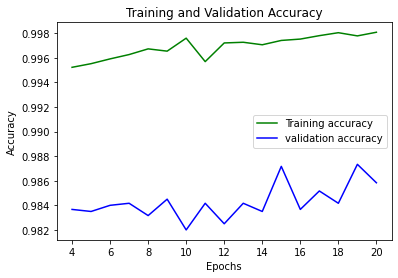

In [ ]:
train_acc = history_3.history['accuracy']
print(len(train_acc))
val_acc = history_3.history['val_accuracy']
epochs = range(4,21)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Prediction:

In [ ]:
prediction_Prelu = best_model_3.predict(X_test)
print(np.argmax(prediction_Prelu[0]))
print(np.argmax(y_test[0]))

7
7
